# Sklearn intro

information from: https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/


Sklearn or Sci-kit learn is a machine learning package in python. Has a number of machine learning models that can be used based on the project that you may be working on.

For our project, we will be look into a Linear Regression model. This will be our initial base model and we can optimize and improve this model or shift onto a model that may be more accurate later on.

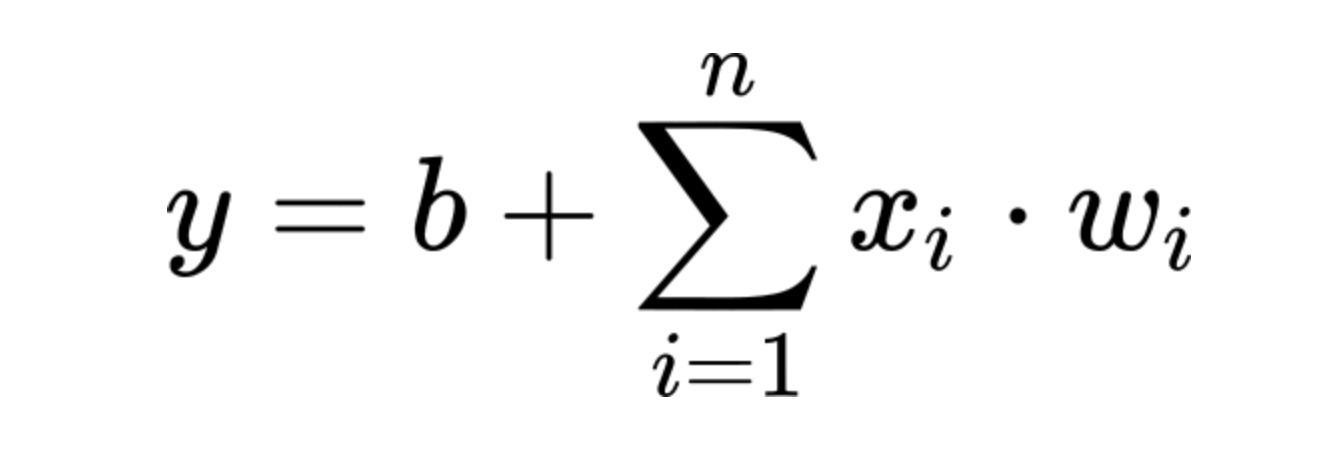

This is the formula for linear regression which is learned in DSC40A.

Linear regression = study the relationship between a single dependent variable Y and one or more independent variable X.

Multiple linear regresssion = linear regression with more than one variable.
For this algorithm, we want to minimize error, or minimize how wrong our linear prediction could be.

Reason why we are using a multiple linear regression model: CPI and PPI data trends are very similar and follow a similar trend so this allows us to use that relationship to predict future CPIs

## Sklearn linear regression

In [6]:
# import packages and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [7]:
# random dataset
CPI = pd.read_csv('/Users/zedsiyed/downloads/cpi_modeling/CPI_Data/Cleaned_CPI_data.csv')
PPI = pd.read_csv('/Users/zedsiyed/downloads/cpi_modeling/CPI_Data/PPI_data.csv')
# PPI = PPI.dropna(axis = 0, how = 'any')
PPI = PPI.T
PPI.columns = PPI.iloc[0]
PPI = PPI.drop(PPI.index[0])
CPI = CPI[CPI['Unnamed: 0'].str.contains("Percent")==False]
CPI = CPI.set_index('Unnamed: 0')
merged = pd.concat([PPI, CPI],axis=1,join="outer")
merged = merged.replace('.',np.NaN)

# only_nums = merged.apply(pd.to_numeric, errors='raise')

merged = merged.fillna(0) # couldnt replace w mean
# merged.columns[merged.columns.str.contains('food') == True]
merged

,Final demand,Final demand goods,Final demand foods,Fresh fruits and melons,Fresh and dry vegetables,Grains,Eggs for fresh use,Oilseeds,Bakery products,Milled rice,...,Medical care,Transportation,Private transportation,New and used motor vehicles,Utilities and public transportation,Household furnishings and operations,Other goods and services,Personal care,Recorded music and music subscriptions,"Men's underwear, nightwear, swimwear, and accessories"
1926-01-01,0,0,0,0,0,37.9,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1926-02-01,0,0,0,0,0,36.5,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1926-03-01,0,0,0,0,0,34.2,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1926-04-01,0,0,0,0,0,34.7,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1926-05-01,0,0,0,0,0,33.7,0,0,0,0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,0,0,0,0,0,0,0,0,0,0,...,525.247,238.333,237.994,119.475,229.805,132.076,479.048,244.968,79.549,167.846
2021-09,0,0,0,0,0,0,0,0,0,0,...,524.818,236.373,236.655,117.947,229.568,133.462,479.525,244.840,79.820,168.872
2021-10,0,0,0,0,0,0,0,0,0,0,...,527.564,241.042,241.413,120.192,231.301,134.745,483.592,246.307,79.954,170.986
2021-11,0,0,0,0,0,0,0,0,0,0,...,528.877,245.532,245.735,122.436,231.880,135.345,484.683,246.445,79.385,170.751


In [8]:
merged = merged.replace('2012-01',0) #could not convert string to float: '2012-01'
# merged.apply(pd.to_numeric(downcast="float"))
# merged = merged.astype(float)
merged = merged.apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)
x = merged.drop('Energy',axis=1)
# x = merged.get(['Food', 'Apparel', 'Transportation', 'Medical care', 'Shelter'])
# x= merged.get(['All items less food, shelter, energy, and used cars and trucks'])
#separte the predicting attribute into Y for model training 
y = merged.get(['Energy'])

# test train split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
y_train = np.ravel(y_train)



# Linear Regression

In [9]:
#create the linear regression environment
LinearRegression_model = LinearRegression()

#fit the data that we want to use in the model
LinearRegression_model.fit(x_train,y_train)

# predict using the X values to get Y predictions
y_predictedLR = LinearRegression_model.predict(x_test)

# cv should reduce overfitting
# cv_scores = cross_val_score(LinearRegression_model, x_train, y_train, scoring='r2', cv=10)
# print(cv_scores.min())
# x.shape
# y.shape
pred_train_lr= LinearRegression_model.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= LinearRegression_model.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

6.554332681951365e-14
1.0
0.0505194544694715
0.9999990861323058


# Random Forest Regression

In [10]:
# using random forest with gridsearch CV
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#setting hyper params of estimator
forest_parameters = {
    'n_estimators': np.arange(10,200,25),
    'max_samples': np.arange(1,10),
    'max_features': ['auto', 'sqrt'], # using float takes percentage of features
    'oob_score': [True, False],
    'random_state': [1]
}


In [11]:

# creating estimator object
forest_model = RandomForestRegressor()

# creating gridsearch (change cv to reduce variance?)
forest_regression = GridSearchCV(RandomForestRegressor(), forest_parameters, cv = 5)
forest_regression.fit(x_train, y_train)
y_pred_acc = forest_regression.predict(x_test)


In [12]:
forest_regression.best_estimator_



RandomForestRegressor(max_features='sqrt', max_samples=9, n_estimators=10,
                      oob_score=True, random_state=1)

In [13]:


# New Model Evaluation metrics 
print(str(mean_squared_error(y_test, y_pred_acc)))
print(str(r2_score(y_test, y_pred_acc)))

376.282681454267
0.8652650545741071


# Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

# creating ridge regression with alpha = 0.01, can use grid search to test different alpha values
rr = Ridge(alpha=10**8)
# fit with testing data
rr.fit(x_train, y_train) 
# predict using training data
pred_train_rr= rr.predict(x_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

# predict using test data
pred_test_rr= rr.predict(x_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

9.928494934379225
0.9792942966443752
5.776990145951462
0.988049962336722


In [15]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

In [16]:
from sklearn.linear_model import RidgeCV

# Create ridge regression with three possible alpha values
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 10**7, 10**8, 10**9])

In [17]:
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y)

In [18]:
# View alpha
model_cv.alpha_

0.1

# Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=1000)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

13.923004673282144
0.9592817515089378
7.737002568616907
0.9785655915322633


In [49]:
preds = y_test.assign(Lasso_Prediction = pred_test_lasso)

preds = preds.fillna(0)
preds = preds.sort_index()

<AxesSubplot:>

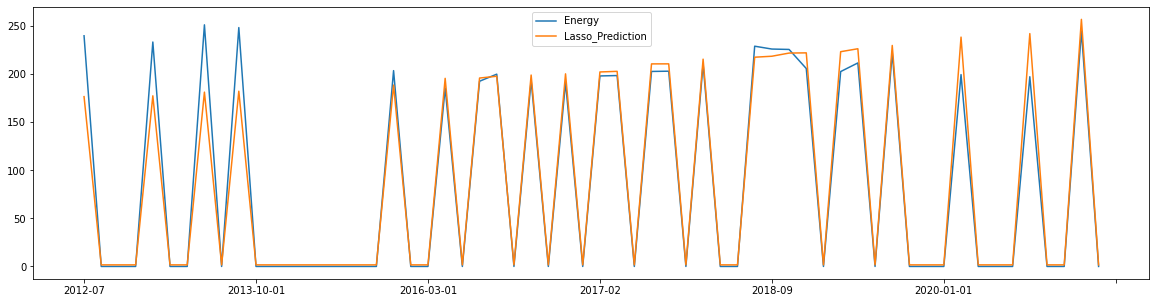

In [52]:
fig, ax = plt.subplots(1,1, sharex = True, figsize=(20,5))
preds[-60:].plot(legend = True, ax = ax)
